## Using xcube to access non-commercial and commercial data sets

This notebook shows how to access different data sets through the EDC Sentinel Hub API via xcube:
1. Access **Sentiel-1** through xcube Sentinel hub Store
2. Access **Sentiel-2** through xcube Sentinel hub Store
3. Access **Sentiel-5P** through xcube Sentinel hub Store
4. Access **Pleiades** through xcube Sentinel hub Store
5. Access **PlanetScope** through xcube Sentinel hub Store

To access all dataset you need to have account at Sentinel Hub and provide your credentials client_id and client_secret and for some datasets instance_id and collection_id. All available via Sentinel-Hub
Brief tutorial video about Sentinel Hub is available [here](https://www.youtube.com/watch?v=tu9kFbMhGV0&t=193s) 

In [42]:
# Set Sentinel Hub credentials
sh_credentials = dict(client_id='<sentinel hub clinet id>',
                      client_secret='<sentinel hub clinet secret>')

In [43]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from sentinelhub import BBox, WmsRequest, DataSource, SHConfig
from functools import partial

# 1. Sentinel-1 GRD

Setting of AOI bounding box

In [44]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 11.00  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [45]:
spatial_res = 0.00018   # = 20.038 meters in degree

 Sentinel Hub currently supported Sentinel-1 GRD (Ground Range Detected) products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-1-GRD)

In [46]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [47]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 5632, time: 40)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-20T08:12:05.256726
    processing_level:          L1B
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    time_coverage_duration:    P80DT0H0M0S
    time_coverage_resolution:  P2DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.01376
    geospatial_lat_max:        54.63864

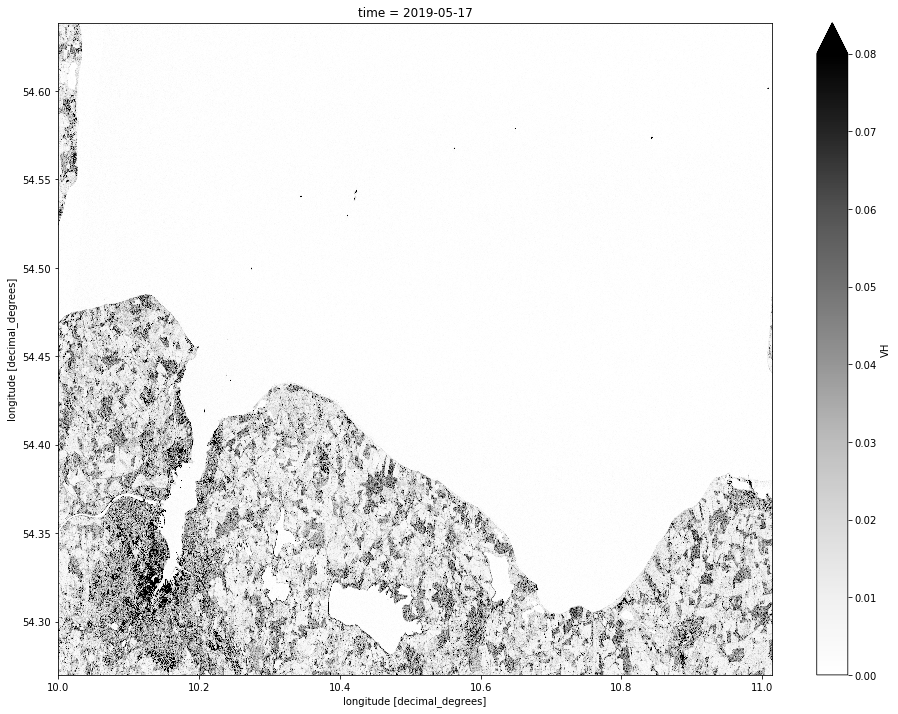

In [48]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

# Sentinel-2 L2A (SLC)

 Sentinel Hub currently supported Sentinel-2 products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-2-L2A)

In [49]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['SCL'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

In [50]:
sh_credentials.update(instance_id='<your sentinel hub instance id>') # To access Sentinel 2, instance id has to be provided. Can be obtained at Sentinel-hub dashboard

In [50]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 5632, time: 46)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2018-05-15T10:30:24 ... 2018-07-31T10:20:24
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(46, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    SCL        (time, lat, lon) uint8 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S2L2A Data Cube Subset
    history:                 [{'program': 'xcube_sh.store.SentinelHubStore', ...
    date_created:            2020-04-20T08:12:44.200997
    processing_level:        L2A
    time_coverage_start:     2018-05-15T10:30:24+00:00
    time_coverage_end:       2018-07-31T10:20:24+00:00
    time_coverage_duration:  P76DT23H50M0S
    geospatial_lon_min:      10.0
    geospatial_lat_min:      54.27
    geospatial_lon_max:      11.01376
    geospatial_lat_max:      54.63864

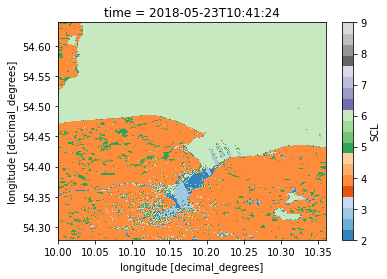

In [51]:
cube.SCL.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='tab20c')

# 3. Sentinel-5P L2

 Sentinel Hub currently supported Sentinel-5P products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-5P-L2)

In [52]:
cube_config = CubeConfig(dataset_name='S5PL2',
                         band_names=['NO2'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=(bbox[2]-bbox[0])/512,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_period='3D')  

In [53]:
sh_credentials.update(api_url='https://creodias.sentinel-hub.com/api/v1') # Sentinel-3 OLCI, Sentinel-3 SLSTR and Sentinel-5 layers are processed on different infrastructure, which requires to used different end-point

In [54]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 169, lon: 512, time: 27)
Coordinates:
  * lat        (lat) float64 54.6 54.6 54.6 54.59 ... 54.28 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.01 10.01 ... 10.99 11.0 11.0 11.0
  * time       (time) datetime64[ns] 2018-05-15T12:00:00 ... 2018-08-01T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(27, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    NO2        (time, lat, lon) float32 dask.array<chunksize=(1, 169, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-20T08:12:58.316198
    processing_level:          None
    time_coverage_start:       2018-05-14T00:00:00+00:00
    time_coverage_end:         2018-08-03T00:00:00+00:00
    time_coverage_duration:    P81DT0H0M0S
    time_coverage_resolution:  P3DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.0
    geospatial_lat_max:        54.600078125

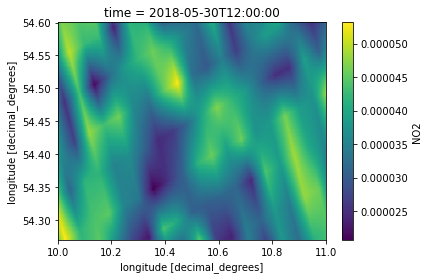

In [55]:
cube.NO2.isel(time=5).plot.imshow()

# 4. Pleiades

Dataset as Pleiades or PlanetScope are available as similar as [BYOC](https://docs.sentinel-hub.com/api/latest/#/data/Airbus-Pleiades?id=accessing-pleiades-data) data i.e. dataset name is 'CUSTOM' and specific instance-id together with collection id have to be provided

In [56]:
sh_credentials.update(instance_id='<sentinel hub pleiades instance id>') # pleiades instance id, can be found at Sentinel Hub dashboard at configuration
sh_credentials.update(api_url='https://services.sentinel-hub.com/api/v1') # changing of the base url back to services.sentinel-hub


New bbox for scenes available for Pleiades (Esselunga supermarket Rome). Others [here](https://docs.google.com/spreadsheets/d/1mlr8oFDkTJyVA_b6r3vfYQFKs9NbvHQyuCMu73x6Aug/edit#gid=974155538)

In [57]:
x1 = 1398664 # meters
y1 = 5145138  # meters

spatial_res = 2 # 2m resolution of Pleiades

In [58]:
def coor(axis,res,point):
    return res*axis + point
point = partial(coor,500,3)

In [59]:
bbox = x1, y1, point(x1), point(y1)

In [95]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['B0', 'B1', 'B2'],                        
                         tile_size=[500, 500],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         geometry=bbox,
                         time_range=['2019-03-31', '2019-05-01'],
                         time_period='10d',
                         spatial_res=spatial_res,
                         band_sample_types='FLOAT32',
                         collection_id='<collection_id>')

In [96]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 4, x: 500, y: 500)
Coordinates:
  * time       (time) datetime64[ns] 2019-04-05 2019-04-15 2019-04-25 2019-05-05
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
  * x          (x) float64 1.399e+06 1.399e+06 1.399e+06 ... 1.4e+06 1.4e+06
  * y          (y) float64 5.147e+06 5.147e+06 5.147e+06 ... 5.145e+06 5.145e+06
Dimensions without coordinates: bnds
Data variables:
    B0         (time, y, x) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B1         (time, y, x) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B2         (time, y, x) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     CUSTOM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-20T08:18:06.911707
    processing_level:          None
    time_coverage_start:       2019-03-31T00:00:00+00:00
    time_coverage_end:         2019-05-10T00:00:00+00:00
    time_coverage_duration:    P40DT0H0M0S
    time_coverage_resolution:  P10DT0H0M0S

In [97]:
cube.time

<xarray.DataArray 'time' (time: 4)>
array(['2019-04-05T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-04-25T00:00:00.000000000', '2019-05-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-05 2019-04-15 2019-04-25 2019-05-05
Attributes:
    standard_name:  time
    bounds:         time_bnds

In [98]:
cube_time = cube.sel(time='2019-04-05')

y, x = cube_time.B0.shape

RED(B2), GREEN(B1), BLUE(B0) [viz](https://docs.sentinel-hub.com/api/latest/#/data/Airbus-Pleiades)

In [103]:
rgb_data = np.zeros((y, x, 3), 'float32')
rgb_data[:, :, 0] = cube_time.B2.values/10000
rgb_data[:, :, 1] = cube_time.B1.values/10000
rgb_data[:, :, 2] = cube_time.B0.values/10000

# Pleiades (directly from Sentinel Hub)

In [111]:
CLIENT_ID = '<your client id>'
CLIENT_SECRET = '<your client secret>'

INSTANCE_ID = '<your instance id>' # instance_id  corresponding to PlanetScope instance (can be found at Sentinel-hub dashboard)
COLECTION_ID = '<your colection id>' # colleciton_id (can be found at Sentinel-hub dashboard at instance configuration)
LAYER_ID = 'TRUECOLOR'  # layer_id can be found at Sentinel-hub dashboard at instance configuration

In [112]:
config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET
config.instance_id = INSTANCE_ID

In [113]:
x1 = 1398664 # meters
y1 = 5145138  # meters
spatial_res = 3 # 3m resolution of PlanetScope

In [114]:
def coor(axis,res,p):
    return res*axis + p
point = partial(coor,500,3)

In [115]:
bbox = BBox(bbox=[x1, y1, point(x1), point(y1)], crs=3857)

In [116]:
byoc_request = WmsRequest(
    data_source=DataSource(COLECTION_ID),
    layer=LAYER_ID,
    bbox=bbox,
    width=500,
    time=('2019-03-31', '2019-05-01'),
    config=config
)

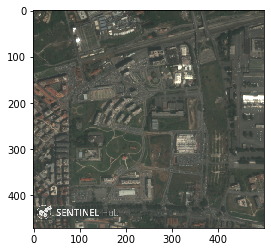

In [117]:
byoc_data = byoc_request.get_data()
plt.imshow(byoc_data[0])

# 5. PlanetScope

Dataset as Pleiades or PlanetScope are available as similar as [BYOC](https://docs.sentinel-hub.com/api/latest/#/data/PlanetScope?id=accessing-planetscope-data) data i.e. dataset name is 'CUSTOM' and specific instance-id together with collection id have to be provided

In [73]:
sh_credentials.update(instance_id='<planetscope instance id>')

New bbox for scenes available for PlaneteScope (Esselunga supermarket Rome). Others [here](https://docs.google.com/spreadsheets/d/1mlr8oFDkTJyVA_b6r3vfYQFKs9NbvHQyuCMu73x6Aug/edit#gid=974155538)

In [81]:
x1 = 1398664 # meters
y1 = 5145138  # meters

spatial_res = 3 # 3m resolution of PlanetScope

In [82]:
width = 500
height = 500
x2 = spatial_res*width + x1
y2 = spatial_res*height + y1

bbox = x1, y1, x2, y2

In [83]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['B1', 'B2', 'B3'],                        
                         tile_size=[width, height],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         geometry=bbox,
                         time_range=['2019-03-31', '2019-05-01'],
                         time_period='1d',
                         spatial_res=spatial_res,
                         band_sample_types='FLOAT32',
                         collection_id='<collection id>')

In [84]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 32, x: 500, y: 500)
Coordinates:
  * time       (time) datetime64[ns] 2019-03-31T12:00:00 ... 2019-05-01T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(32, 2), meta=np.ndarray>
  * x          (x) float64 1.399e+06 1.399e+06 1.399e+06 ... 1.4e+06 1.4e+06
  * y          (y) float64 5.147e+06 5.147e+06 5.147e+06 ... 5.145e+06 5.145e+06
Dimensions without coordinates: bnds
Data variables:
    B1         (time, y, x) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B2         (time, y, x) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B3         (time, y, x) float32 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     CUSTOM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-20T08:17:01.422435
    processing_level:          None
    time_coverage_start:       2019-03-31T00:00:00+00:00
    time_coverage_end:         2019-05-02T00:00:00+00:00
    time_coverage_duration:    P32DT0H0M0S
    time_coverage_resolution:  P1DT0H0M0S

In [85]:
cube_time = cube.isel(time=0, x=slice(0,width),y=slice(0,height))
y, x = cube_time.B1.shape

RED(B3), GREEN(B2), BLUE(B1) [viz](https://docs.sentinel-hub.com/api/latest/#/data/PlanetScope)

In [86]:
rgb_data = np.zeros((y, x, 3), 'float32')
rgb_data[:, :, 0] = cube_time.B3.values/3000
rgb_data[:, :, 1] = cube_time.B2.values/3000
rgb_data[:, :, 2] = cube_time.B1.values/3000

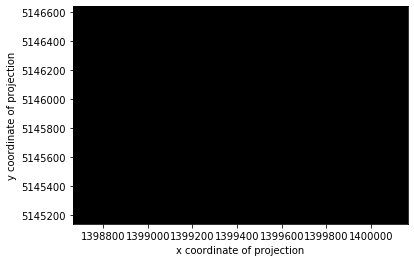

In [87]:
rgb_array = xr.DataArray(rgb_data, dims=('y', 'x', 'rgb'),  coords=dict(x=cube.B1.x, y=cube.B1.y))
rgb_array.plot.imshow()

# PlanetScope (directly from Sentinel Hub)

In [118]:
CLIENT_ID = '<your client id>'
CLIENT_SECRET = '<your client secret>'

INSTANCE_ID = '<your instance id>' # instance_id  corresponding to PlanetScope instance (can be found at Sentinel-hub dashboard)
COLECTION_ID = '<your colection id>' # colleciton_id (can be found at Sentinel-hub dashboard at instance configuration)
LAYER_ID = '1_TRUE-COLOR' # layer_id can be found at Sentinel-hub dashboard at instance configuration

In [119]:
config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET
config.instance_id = INSTANCE_ID

In [120]:
x1 = 1398864 # meters
y1 = 5145138  # meters
spatial_res = 3 # 3m resolution of PlanetScope

In [121]:
def coor(axis,res,point):
    return res*axis + point
res = partial(coor,500,3)

In [122]:
bbox = BBox(bbox=[x1, y1, res(x1), res(y1)], crs=3857)

In [123]:
byoc_request = WmsRequest(
    data_source=DataSource(COLECTION_ID),
    layer=LAYER_ID,
    bbox=bbox,
    width=500,
    time=('2019-03-31', '2019-05-01'),
    config=config
)

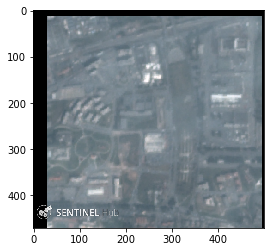

In [124]:
byoc_data = byoc_request.get_data()
plt.imshow(byoc_data[0])